<a href="https://colab.research.google.com/github/MuddamSiddartha/FMML_Assignments/blob/main/Module_01_Lab_01_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting features from data
1.   Try with different languages.


In [ ]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=974409c26e679954f81df46dce7a16b3c40f4a3133ecb004085fac42f698d0a2
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [ ]:
topic1 = 'Giraffe'
topic2 = 'Elephant'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('it')

it1 = wikipedia.page(topic1).content
it2 = wikipedia.page(topic2).content

In [ ]:
it1

'La giraffa (Giraffa Brisson, 1762) è un genere di mammifero artiodattilo.\nOriginaria dell\'Africa, è il più alto animale terrestre, nonché il più grande ruminante esistente.\nTradizionalmente il genere contiene una singola specie, Giraffa camelopardalis L., con nove sottospecie. Tuttavia, secondo alcuni studiosi il genere va diviso in più specie diverse (v. sotto per i dettagli). Sono inoltre state descritte sette specie estinte conosciute da fossili.\nLe principali caratteristiche distintive delle giraffe sono il collo e le zampe estremamente allungate, per questo è ritenuto dagli specialisti un “capolavoro di ingegneria”, soprattutto per la capacità di gestire la pressione all’interno dei loro vasi sanguigni; gli ossiconi, simili a corna, sul capo; grandi occhi neri con ciglia lunghe e il suo caratteristico mantello a macchie che varia da sottospecie  . L\'animale è classificato nella famiglia Giraffidae, insieme al suo parente vivente più prossimo, l\'okapi. La sua distribuzione g

In [ ]:
it2

'The Elephant Man è un film biografico del 1980 diretto da David Lynch.\nIl film è stato adattato dai libri The Elephant Man and Other Reminiscences del dottor Frederick Treves e The Elephant Man: A Study in Human Dignity di Ashley Montagu.\nIl film è stato ben accolto all\'epoca della distribuzione e il successo consacrò i protagonisti Anthony Hopkins, John Hurt, Hannah Gordon e altri membri del cast.\n\n\n== Trama ==\nNella Londra di fine Ottocento, il deforme Joseph Merrick (nelle prime biografie risultò erroneamente chiamato John, ma è Joseph il nome autentico) viene scoperto dal dottor Frederick Treves durante uno spettacolo di strada gestito dal signor Bytes. Merrick presenta numerose deformazioni in gran parte del corpo, soprattutto nel capo, per via della sua sindrome di Proteo, tanto da venire soprannominato l\'Uomo Elefante; per non essere deriso quando cammina in mezzo alla gente comune, Merrick indossa in testa un sacco bucato cucito ad un cappello, in modo tale da coprire 

In [ ]:
eng1

'The giraffe is a large African hoofed mammal belonging to the genus Giraffa. It is the tallest living terrestrial animal and the largest ruminant on Earth. Traditionally, giraffes were thought to be one species, Giraffa camelopardalis, with nine subspecies. Most recently, researchers proposed dividing them into up to eight extant species due to new research into their mitochondrial and nuclear DNA, as well as morphological measurements. Seven other extinct species of Giraffa are known from the fossil record.\nThe giraffe\'s chief distinguishing characteristics are its extremely long neck and legs, its horn-like ossicones, and its spotted coat patterns. It is classified under the family Giraffidae, along with its closest extant relative, the okapi. Its scattered range extends from Chad in the north to South Africa in the south, and from Niger in the west to Somalia in the east. Giraffes usually inhabit savannahs and woodlands. Their food source is leaves, fruits, and flowers of woody p

In [ ]:
eng2

'Elephants are the largest living land animals. Three living species are currently recognised: the African bush elephant, the African forest elephant, and the Asian elephant. They are the only surviving members of the family Elephantidae and the order Proboscidea; extinct relatives include mammoths and mastodons. Distinctive features of elephants include a long proboscis called a trunk, tusks, large ear flaps, pillar-like legs, and tough but sensitive grey skin. The trunk is prehensile, bringing food and water to the mouth and grasping objects. Tusks, which are derived from the incisor teeth, serve both as weapons and as tools for moving objects and digging. The large ear flaps assist in maintaining a constant body temperature as well as in communication. African elephants have larger ears and concave backs, whereas Asian elephants have smaller ears and convex or level backs.\nElephants are scattered throughout sub-Saharan Africa, South Asia, and Southeast Asia and are found in differe

In [ ]:
def cleanup(text):
  text = text.lower()
  text = re.sub('[^a-z]+', '', text)
  return text

In [ ]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
it1 = cleanup(it1)
it2 = cleanup(it2)

In [ ]:
print(it1)

lagiraffagiraffabrissonungeneredimammiferoartiodattilooriginariadellafricailpialtoanimaleterrestrenonchilpigranderuminanteesistentetradizionalmenteilgenerecontieneunasingolaspeciegiraffacamelopardalislconnovesottospecietuttaviasecondoalcunistudiosiilgenerevadivisoinpispeciediversevsottoperidettaglisonoinoltrestatedescrittesettespecieestinteconosciutedafossilileprincipalicaratteristichedistintivedellegiraffesonoilcolloelezampeestremamenteallungateperquestoritenutodaglispecialistiuncapolavorodiingegneriasoprattuttoperlacapacitdigestirelapressioneallinternodeilorovasisanguignigliossiconisimiliacornasulcapograndiocchinericonciglialungheeilsuocaratteristicomantelloamacchiechevariadasottospecielanimaleclassificatonellafamigliagiraffidaeinsiemealsuoparenteviventepiprossimolokapilasuadistribuzionegeograficasparsasiestendedalciadanordalsudafricaasudedalnigeraovestfinoallasomaliaadestlegiraffeabitanoabitualmentesavaneeareeboschivelalorofontediciboprimariasonofogliefruttiefioridipiantelegnoseprin

In [ ]:
print(it2)

theelephantmanunfilmbiograficodeldirettodadavidlynchilfilmstatoadattatodailibritheelephantmanandotherreminiscencesdeldottorfredericktrevesetheelephantmanastudyinhumandignitydiashleymontaguilfilmstatobenaccoltoallepocadelladistribuzioneeilsuccessoconsacriprotagonistianthonyhopkinsjohnhurthannahgordonealtrimembridelcasttramanellalondradifineottocentoildeformejosephmerricknelleprimebiografierisulterroneamentechiamatojohnmajosephilnomeautenticovienescopertodaldottorfredericktrevesduranteunospettacolodistradagestitodalsignorbytesmerrickpresentanumerosedeformazioniingranpartedelcorposoprattuttonelcapoperviadellasuasindromediproteotantodaveniresoprannominatoluomoelefantepernonesserederisoquandocamminainmezzoallagentecomunemerrickindossaintestaunsaccobucatocucitoaduncappelloinmodotaledacoprireledeformitdelvisoedelcraniobytessiritieneilproprietariodimerricktantochevuolesserepagatopercederloatrevescheperunbreveperiodoloportaalsuoospedalepermostrarloaicolleghiappenamerrickfaritornodalsuoproprieta

In [ ]:
print(eng1)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeswerethoughttobeonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintouptoeightextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaaswellasmorphologicalmeasurementssevenotherextinctspeciesofgiraffaareknownfromthefossilrecordthegiraffeschiefdistinguishingcharacteristicsareitsextremelylongneckandlegsitshornlikeossiconesanditsspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostotherherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliveinherdsofrelatedfemalesan

In [ ]:
print(eng2)

elephantsarethelargestlivinglandanimalsthreelivingspeciesarecurrentlyrecognisedtheafricanbushelephanttheafricanforestelephantandtheasianelephanttheyaretheonlysurvivingmembersofthefamilyelephantidaeandtheorderproboscideaextinctrelativesincludemammothsandmastodonsdistinctivefeaturesofelephantsincludealongprobosciscalledatrunktuskslargeearflapspillarlikelegsandtoughbutsensitivegreyskinthetrunkisprehensilebringingfoodandwatertothemouthandgraspingobjectstuskswhicharederivedfromtheincisorteethservebothasweaponsandastoolsformovingobjectsanddiggingthelargeearflapsassistinmaintainingaconstantbodytemperatureaswellasincommunicationafricanelephantshavelargerearsandconcavebackswhereasasianelephantshavesmallerearsandconvexorlevelbackselephantsarescatteredthroughoutsubsaharanafricasouthasiaandsoutheastasiaandarefoundindifferenthabitatsincludingsavannahsforestsdesertsandmarshestheyareherbivorousandtheystaynearwaterwhenitisaccessibletheyareconsideredtobekeystonespeciesduetotheirimpactontheirenvironment

In [ ]:
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st
def key2string(keys):
  return [tuple2string(i) for i in keys]
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

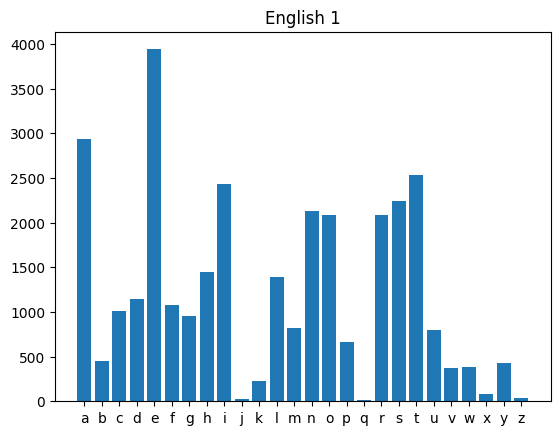

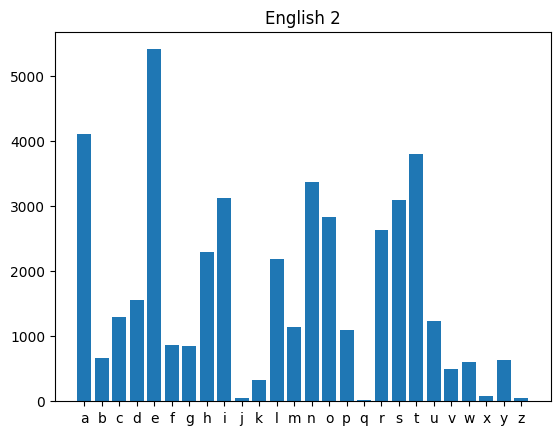

In [ ]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

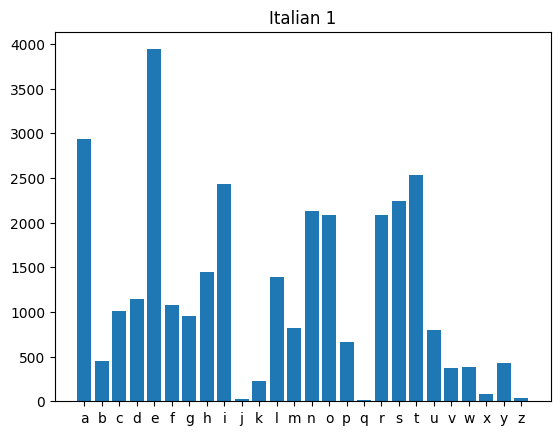

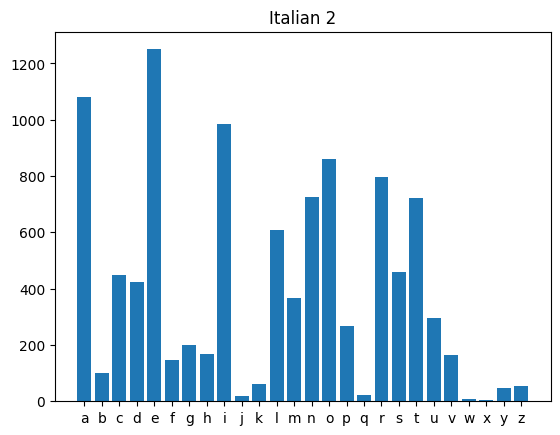

In [ ]:
unigram_it1 = Counter(ngrams(it1,1))
plothistogram(unigram_eng1)
plt.title('Italian 1')
plt.show()
unigram_it2 = Counter(ngrams(it2,1))
plothistogram(unigram_it2)
plt.title('Italian 2')
plt.show()

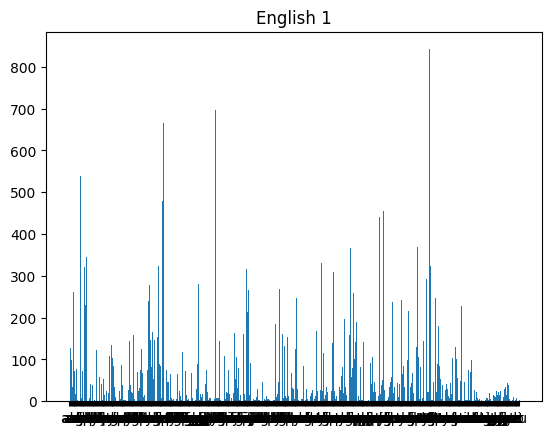

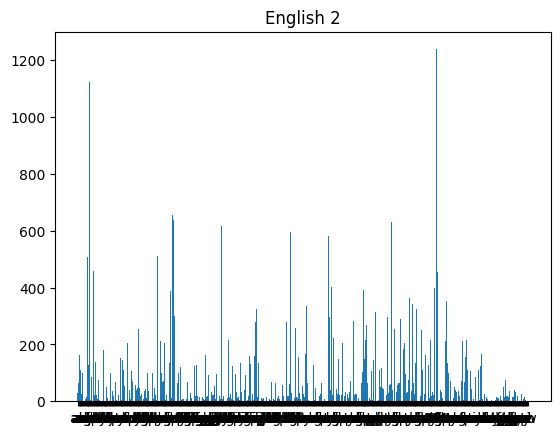

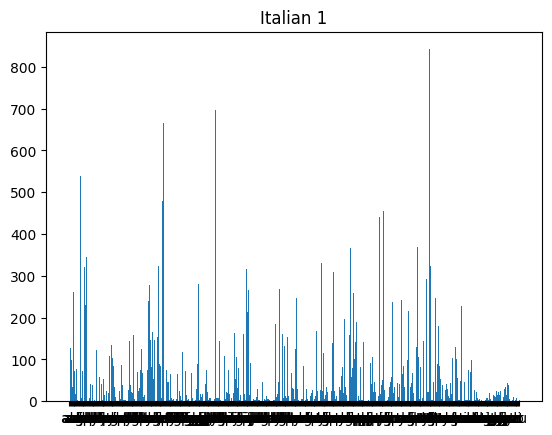

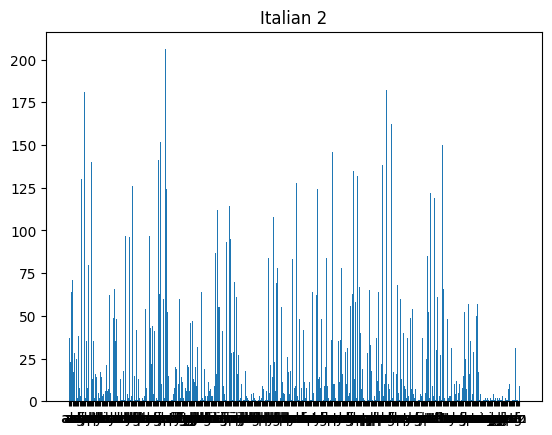

In [ ]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_it1 = Counter(ngrams(it1,2))
plothistogram(bigram_eng1)
plt.title('Italian 1')
plt.show()

bigram_it2 = Counter(ngrams(it2,2))
plothistogram(bigram_it2)
plt.title('Italian 2')
plt.show()

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

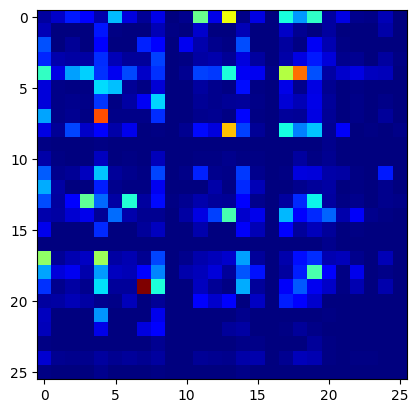

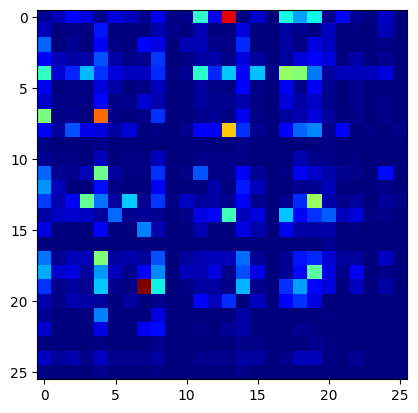

In [ ]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

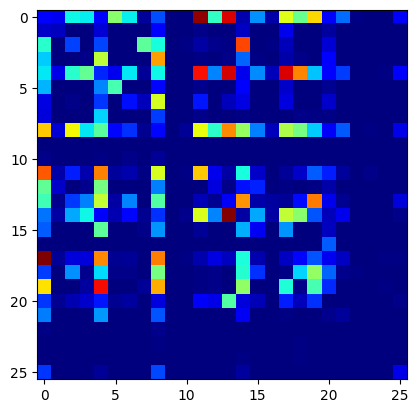

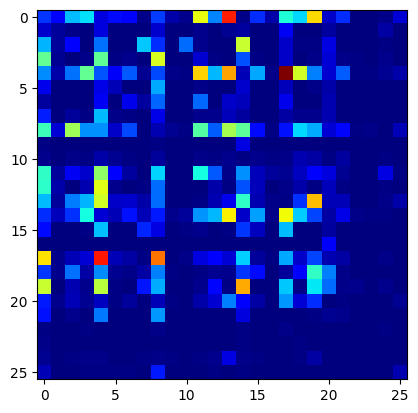

In [ ]:
biit1 = plotbihistogram(bigram_it1)
plt.show()
biit2 = plotbihistogram(bigram_it2)

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [ ]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nItalian 1:')
ShowTopN(biit1)
print('\nItalian 2:')
ShowTopN(biit2)


English 1:
('t', 'h') : 842.0
('h', 'e') : 697.0
('e', 's') : 665.0
('i', 'n') : 594.0
('a', 'n') : 538.0
('e', 'r') : 478.0
('r', 'e') : 454.0
('r', 'a') : 441.0
('a', 'l') : 404.0
('n', 'd') : 393.0

English 2:
('t', 'h') : 1238.0
('a', 'n') : 1123.0
('h', 'e') : 983.0
('i', 'n') : 863.0
('n', 't') : 664.0
('e', 'r') : 655.0
('e', 's') : 637.0
('r', 'e') : 629.0
('h', 'a') : 618.0
('l', 'e') : 597.0

Italian 1:
('r', 'a') : 574.0
('o', 'n') : 570.0
('a', 'l') : 565.0
('e', 'n') : 531.0
('e', 'r') : 528.0
('a', 'n') : 528.0
('t', 'e') : 514.0
('e', 'l') : 512.0
('c', 'o') : 478.0
('l', 'a') : 468.0

Italian 2:
('e', 'r') : 206.0
('r', 'e') : 182.0
('a', 'n') : 181.0
('r', 'i') : 162.0
('e', 'n') : 152.0
('t', 'o') : 150.0
('n', 't') : 146.0
('e', 'l') : 141.0
('a', 't') : 140.0
('r', 'a') : 138.0


2.   The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?

   Ans: If we utilise extremely distinct subjects, there is very little possibility that they will be related to each other, which will have a direct influence on our model and we will not obtain the correct result and we will not identify the relavance as well as characteristics in between them. Now, if we utilise material from a source other than Wikipedia, we don't know how much of the information on the website is legitimate or how exactly the content is written, and there is no validation, and grammatical errors play a key role in our model, affecting our conclusion.







3.   How can we use and visualize trigrams and higher n-grams?

    Ans: Using trigrams and greater n-grams entails dividing text into sequences of three or more consecutive words, which can provide useful insights into the structure and patterns of the text data. After tokenizing the text, frequency analysis may be used to detect prevalent words and patterns. Understanding how these n-grams are employed in context is critical for having a better understanding of their meaning and use. Depending on the nature of the data and the precise insights sought, they can be visualised using techniques such as frequency distribution plots, word clouds, heatmaps, network graphs, and trend analysis across time. These visualisations give a straightforward and easy method to understand the most prevalent n-grams and their associations within the text corpus, which may help with tasks like sentiment analysis, as well as more advanced natural language processing applications.




1.  Which is the best combination of features?

 Ans: Feature extraction from data is an important stage in machine learning and data analysis. The best feature combination is determined on the job at hand and the nature of the dataset. First and foremost, features must be aligned with the project's goal. Sentiment analysis, for example, may require characteristics such as word frequencies, sentiment lexicons, and n-grams, whereas computer vision applications may rely on pixel values, edges, or texture patterns. area knowledge is essential; qualities that are important in one area may not be as important in another. Furthermore, the size of the dataset and associated dimensionality difficulties must be addressed. More complicated features can be used with a big dataset, but in smaller datasets, simplicity frequently wins to avoid overfitting, Correlations and redundancy among traits should be examined carefully. Incorporating highly correlated characteristics may not add much and may potentially generate difficulties such as multicollinearity in regression models. Another way to improve the feature set is through feature engineering, such as implementing interactions or transformations. Model-specific needs are also important; for example, decision trees handle categorical variables differently than neural networks. Experimentation and assessment are critical. Trying out alternative feature combinations and evaluating performance using techniques like cross-validation aids in identifying the most effective features for the particular situation. Ensemble approaches, such as Random Forests or Gradient Boosting, excel in handling a wide range of characteristics and, in particular, at identifying the most useful ones.The initial collection of features is improved depending on model performance in an iterative process, making feature selection a dynamic and adaptable part of data analysis and machine learning. In essence, the art of feature extraction involves balancing data-driven insights with domain experience.




2.  How would you test or visualize four or more features?

 Ans: 1. Pairwise Scatter Plots: Create scatter plots for pairs of features. For four features, you'll have six pairwise scatter plots. Use color or shape to represent different classes or categories.

2. 3D Scatter Plots: If you have four numeric features, you can create a 3D scatter plot where three axes represent three features, and the fourth feature is represented by color or size of the points.

3. Parallel Coordinates Plot: This is useful for visualizing multivariate data. Each feature is represented as a vertical axis, and lines connect points that have the same values for all but one feature.

4. Heatmap: If you're interested in correlations between features, a heatmap can be used to display the correlation matrix. Lighter colors represent stronger correlations.

5. Box Plots or Violin Plots: These can be used to visualize the distribution of a numeric feature for different categories or classes.

6. Pairwise Correlation Matrix: Create a matrix where each cell represents the correlation coefficient between two features. This can help identify strong relationships.

7. Scatter Matrix: Similar to pairwise scatter plots, but for more than two features. It displays scatter plots for all combinations of features.

8. Ternary Plot: If your features represent percentages or proportions that add up to a constant, a ternary plot can be used to visualize them in a 2D space.

9. Radviz Plot: This is a method for visualizing multivariate data in a 2D space. Each feature is represented as a point on a unit circle, and the position of a sample is determined by the weighted average of the positions of its features.

10. Principal Component Analysis (PCA) or t-SNE: These techniques can be used for dimensionality reduction and visualization of high-dimensional data.

11. Interactive Visualization Tools: Tools like Tableau, Power BI, or Plotly can be used for creating interactive visualizations that allow you to explore the relationships between multiple features.

12. Correlation Network Graphs: If you're interested in visualizing the relationships between multiple features in a network-like structure, this can be a powerful approach.




3.   Can you come up with your own features?

Ans
1. Average Word Length: Calculating the average length of words in a text.

2. Punctuation Frequency: Counting the occurrence of punctuation marks like commas, periods, exclamation marks, etc.

3. Sentiment Score: Using a sentiment analysis tool to determine the overall sentiment of a piece of text.

4. Frequency of Technical Terms: Identifying and counting domain-specific jargon or technical terms.

5. Ratio of Numerical to Text Data: Calculating the proportion of numerical data to text data in a dataset.

6. Proximity of Keywords: Analyzing the distance or frequency of specific keywords in a document.

7. Syntax Complexity: Assessing the complexity of sentence structures using measures like average sentence length or the use of clauses.

8. Geographical References: Detecting references to specific locations or regions in a text.

9. Temporal References: Identifying mentions of time, dates, or specific time periods.

10. Emphasis on Certain Words: Analyzing the frequency or formatting of words in all caps or bold.

4Q.  Will these features work for different classes other than 0 and 1?

 Ans:
 Yes, the features mentioned can potentially be used for different classes beyond just binary classification (0 and 1). Many of these features are agnostic to the number of classes and can be applied to multi-class classification problems as well.

1. Average Word Length: This feature can be applied regardless of the number of classes. It calculates the average length of words in a text and can be informative in various contexts.

2. Punctuation Frequency: Similarly, punctuation frequency is independent of the number of classes and can be useful in understanding the structure of text across multiple categories.

3. Sentiment Score: Sentiment analysis tools can provide sentiment scores that are not limited to binary sentiment (positive or negative). They can assign sentiment scores on a continuous scale, which can be useful for multi-class sentiment analysis.

4. Frequency of Technical Terms: This feature can also be applied across different classes, helping to identify domain-specific terminology in various contexts.

5. Ratio of Numerical to Text Data: This feature is applicable irrespective of the number of classes and can provide insights into the composition of data.

6. Proximity of Keywords: Analyzing the proximity of keywords can be adapted for multi-class classification by considering the relevance of specific terms within different categories.

7. Syntax Complexity: Sentence structure complexity can be analyzed for various classes, offering insights into the linguistic characteristics of different types of text.

8. Emphasis on Certain Words: These features can be used in multi-class scenarios to identify and analyze references to locations, time, or emphasized words across different contexts.

9. Conjunction Usage: The frequency of conjunctions can be informative across various classes, indicating different patterns of expression.

10. Use of Acronyms or Abbreviations: This feature can be applied broadly to identify and count instances of abbreviated forms of words or phrases in different categories.

11. Unique Vocabulary Size: The size of the unique vocabulary can be compared across multiple classes to understand the diversity of language use in different contexts.


